In [1]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pylab as plt
from tqdm.autonotebook import tqdm
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

/home/nandan/.local/share/virtualenvs/ModelInformedRL-v_iDpmFY/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'cuda'

In [2]:
from tensorboardX import SummaryWriter
writer = SummaryWriter('runs/kin-kin/stepped-bicycle')

In [3]:
train_frame = pd.read_pickle("../../data/train_data.pkl")
test_frame = pd.read_pickle("../../data/test_data.pkl")
#train_frame = train_frame.iloc[-1:]; test_frame = train_frame;

In [4]:
class TraceDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        input = torch.tensor(train_frame.iloc[idx]['input'], dtype=torch.float32)
        target = torch.tensor(train_frame.iloc[idx]['target'], dtype=torch.float32)
        return input, target

train_dataset = TraceDataset(train_frame)
test_dataset = TraceDataset(test_frame)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [5]:
def bicycle_model_eval(input, last_pose):
    # This version takes in an input of dim 5
    states = []  # torch.zeros((81, 4))
    L = 0.3302
    TS = 0.1
    X, Y, THETA, V = 0, 1, 2, 3
    #states.append(torch.tensor([last_pose[0],last_pose[1],last_pose[2],input[0]], requires_grad=True))
    state = torch.zeros((4,))
    state[X] = last_pose[0]
    state[Y] = last_pose[1]
    state[THETA] = last_pose[2]
    state[V] = input[0]
    states.append(state)
    for i in range(1,11):
        # Advance bicycle model
        state = torch.zeros((4,))
        state[X] = states[i-1][X] + (TS * states[i-1][V] * torch.cos(states[i-1][THETA]))
        state[Y] = states[i-1][Y] + (TS * states[i-1][V] * torch.sin(states[i-1][THETA]))
        state[THETA] = states[i-1][THETA] + (TS * (states[i-1][V] * torch.tan(input[1])) / L)
        state[V] = states[i-1][V] + TS*input[2]
        states.append(state)
    for i in range(11,21):
        # Advance bicycle model
        state = torch.zeros((4,))
        state[X] = states[i-1][X] + (TS * states[i-1][V] * torch.cos(states[i-1][THETA]))
        state[Y] = states[i-1][Y] + (TS * states[i-1][V] * torch.sin(states[i-1][THETA]))
        state[THETA] = states[i-1][THETA] + (TS * (states[i-1][V] * torch.tan(input[3])) / L)
        state[V] = states[i-1][V] + TS*input[4]
        states.append(state)
    for i in range(21,31):
        # Advance bicycle model
        state = torch.zeros((4,))
        state[X] = states[i-1][X] + (TS * states[i-1][V] * torch.cos(states[i-1][THETA]))
        state[Y] = states[i-1][Y] + (TS * states[i-1][V] * torch.sin(states[i-1][THETA]))
        state[THETA] = states[i-1][THETA] + (TS * (states[i-1][V] * torch.tan(input[5])) / L)
        state[V] = states[i-1][V] + TS*input[6]
        states.append(state)
    for i in range(31,41):
        # Advance bicycle model
        state = torch.zeros((4,))
        state[X] = states[i-1][X] + (TS * states[i-1][V] * torch.cos(states[i-1][THETA]))
        state[Y] = states[i-1][Y] + (TS * states[i-1][V] * torch.sin(states[i-1][THETA]))
        state[THETA] = states[i-1][THETA] + (TS * (states[i-1][V] * torch.tan(input[7])) / L)
        state[V] = states[i-1][V] + TS*input[8]
        states.append(state)
    for i in range(41,51):
        # Advance bicycle model
        state = torch.zeros((4,))
        state[X] = states[i-1][X] + (TS * states[i-1][V] * torch.cos(states[i-1][THETA]))
        state[Y] = states[i-1][Y] + (TS * states[i-1][V] * torch.sin(states[i-1][THETA]))
        state[THETA] = states[i-1][THETA] + (TS * (states[i-1][V] * torch.tan(input[9])) / L)
        state[V] = states[i-1][V] + TS*input[10]
        states.append(state)
    for i in range(51,61):
        # Advance bicycle model
        state = torch.zeros((4,))
        state[X] = states[i-1][X] + (TS * states[i-1][V] * torch.cos(states[i-1][THETA]))
        state[Y] = states[i-1][Y] + (TS * states[i-1][V] * torch.sin(states[i-1][THETA]))
        state[THETA] = states[i-1][THETA] + (TS * (states[i-1][V] * torch.tan(input[11])) / L)
        state[V] = states[i-1][V] + TS*input[12]
        states.append(state)
    for i in range(61,71):
        # Advance bicycle model
        state = torch.zeros((4,))
        state[X] = states[i-1][X] + (TS * states[i-1][V] * torch.cos(states[i-1][THETA]))
        state[Y] = states[i-1][Y] + (TS * states[i-1][V] * torch.sin(states[i-1][THETA]))
        state[THETA] = states[i-1][THETA] + (TS * (states[i-1][V] * torch.tan(input[13])) / L)
        state[V] = states[i-1][V] + TS*input[14]
        states.append(state)
    for i in range(71,81):
        # Advance bicycle model
        state = torch.zeros((4,))
        state[X] = states[i-1][X] + (TS * states[i-1][V] * torch.cos(states[i-1][THETA]))
        state[Y] = states[i-1][Y] + (TS * states[i-1][V] * torch.sin(states[i-1][THETA]))
        state[THETA] = states[i-1][THETA] + (TS * (states[i-1][V] * torch.tan(input[15])) / L)
        state[V] = states[i-1][V] + TS*input[16]
        states.append(state)
    trace = torch.vstack(states)[1:,0:3]
    return trace


def custom_loss_func(prediction, target, output):
    loss = F.mse_loss(prediction, target)
    #loss += 10*output[0]**2 if output[0]<0 else 0
    #loss += 2*torch.linalg.norm(output)**2
    return loss

class LSTMPredictor(nn.Module):
    def __init__(self, input_dim=3, hidden_dim=10, target_size=17):
        super(LSTMPredictor, self).__init__()
        self.hidden_dim = hidden_dim

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=2, batch_first=True)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2output = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.Linear(hidden_dim, target_size)
        )

    def forward(self, inputs):
        lstm_out, _ = self.lstm(inputs)
        output = self.hidden2output(lstm_out)
        output_list = [F.softplus(output[:,0])]
        for i in range(8):
            output_list.append(torch.tanh(output[:,(2*i)+1])*np.pi)
            output_list.append(output[:,(2*i)+2])
        output = torch.column_stack(output_list)
        return output

In [6]:
net = LSTMPredictor()
#net.load_state_dict(torch.load("best_stepped_bicycle.pt"))

In [7]:
torch.tensor(train_frame.iloc[0]['input'])

tensor([[-54.8251,  24.3798,   2.0672],
        [-54.8444,  24.4154,   2.0632],
        [-54.8635,  24.4511,   2.0632],
        [-54.8826,  24.4868,   2.0672],
        [-54.9019,  24.5224,   2.0672],
        [-54.9212,  24.5580,   2.0711],
        [-54.9406,  24.5936,   2.0711],
        [-54.9601,  24.6291,   2.0750],
        [-54.9796,  24.6646,   2.0750],
        [-54.9992,  24.7000,   2.0789]], dtype=torch.float64)

In [8]:
inp = torch.tensor(train_frame.iloc[0]['input'], dtype=torch.float32)
outp = net(inp)
target = torch.tensor(train_frame.iloc[0]['target'], dtype=torch.float32)
outp.shape

torch.Size([10, 17])

In [9]:
outp_trace = bicycle_model_eval(outp[-1], inp[-1])
#from viz_net import make_dot

In [10]:
loss = custom_loss_func(outp_trace, target.squeeze(), outp[-1])
#g = make_dot(loss)
#g.view()

In [11]:
#g = make_dot(outp[-1])
#g.view()

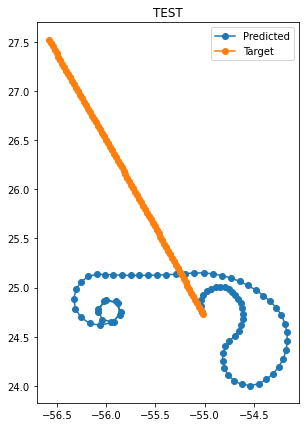

In [12]:
fig, ax = plt.subplots(figsize=(7,7));
ax.set_aspect(1.0, adjustable='box');
ax.set_title("TEST");
ax.plot(outp_trace[:,0].detach().numpy(), outp_trace[:,1].detach().numpy(), marker='o', label='Predicted')
ax.plot(target[:,0].detach().numpy(), target[:,1].detach().numpy(), marker='o', label='Target')
ax.legend()

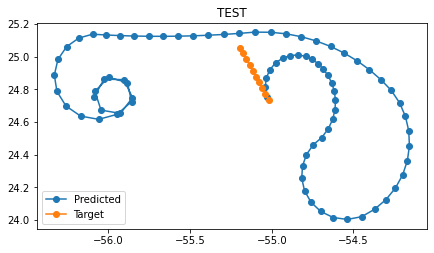

In [13]:
fig, ax = plt.subplots(figsize=(7,7));
ax.set_aspect(1.0, adjustable='box');
ax.set_title("TEST");
ax.plot(outp_trace[:,0].detach().numpy(), outp_trace[:,1].detach().numpy(), marker='o', label='Predicted')
ax.plot(target[:10,0].detach().numpy(), target[:10,1].detach().numpy(), marker='o', label='Target')
ax.legend()

In [14]:
loss = nn.MSELoss()
loss(outp_trace,torch.tensor(train_frame.iloc[0]['target'], dtype=torch.float32))

tensor(8.0072, grad_fn=<MseLossBackward0>)

In [ ]:
# Training Loop
torch.autograd.set_detect_anomaly(True)
net = LSTMPredictor()
net.to(DEVICE)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
train_losses = list()
test_losses = list()
BATCH_SIZE = 32

for epoch in range(100):
    cum_train_loss = 0.0
    net.train()
    i=0
    for input_data, target_data in tqdm(train_dataloader):
        if i%BATCH_SIZE == 0:
            net.zero_grad()
        input_data = input_data.squeeze().to(DEVICE)
        outp = net(input_data)
        outp = outp.squeeze()
        outp = outp.to("cpu")
        target_data = target_data.squeeze()
        #print(outp.shape)
        outp_trace = bicycle_model_eval(outp[-1], input_data[-1].detach().clone().to("cpu")).to(DEVICE)
        loss = custom_loss_func(outp_trace, target_data.squeeze().to(DEVICE), outp[-1])
        loss.backward()
        if i%BATCH_SIZE == 0:
            optimizer.step()
        cum_train_loss += loss.item()
    # Catch remainder gradients
    optimizer.step()
    net.zero_grad()
    
    train_fig, train_ax = plt.subplots(figsize=(7,7))
    train_ax.set_aspect(1.0, adjustable='box')
    train_ax.set_title(f"Epoch {epoch} training plot | Loss:{loss.item()}")
    train_ax.plot(outp_trace[:,0].detach().cpu().numpy(), outp_trace[:,1].detach().cpu().numpy(), marker='o', label="Predicted")
    train_ax.plot(target_data[:,0].detach().cpu().numpy(), target_data[:,1].detach().cpu().numpy(), marker='o', label="Truth")
    train_ax.legend()
    
    cum_train_loss /= len(train_dataset)
    train_losses.append(cum_train_loss)
    print(cum_train_loss)
    cum_test_loss = 0.0
    net.eval()
    with torch.no_grad():
        for input_data, target_data in tqdm(test_dataloader):
            input_data = input_data.squeeze().to(DEVICE)
            outp = net(input_data)
            outp = outp.squeeze()
            outp = outp.to("cpu")
            target_data = target_data.squeeze()
            outp_trace = bicycle_model_eval(outp[-1], input_data[-1].detach().clone().to("cpu")).to(DEVICE)
            loss = custom_loss_func(outp_trace, target_data.squeeze().to(DEVICE), outp[-1])
            cum_test_loss += loss.item()
        test_fig, test_ax = plt.subplots(figsize=(7,7))
        test_ax.set_aspect(1.0, adjustable='box')
        test_ax.set_title(f"Epoch {epoch} testing plot: Loss:{loss.item()}")
        test_ax.plot(outp_trace[:,0].detach().cpu().numpy(), outp_trace[:,1].detach().cpu().numpy(), marker='o', label="Predicted")
        test_ax.plot(target_data[:,0].detach().cpu().numpy(), target_data[:,1].detach().cpu().numpy(), marker='o', label="Truth")
        test_ax.legend()
    cum_test_loss /= len(test_dataset)
    test_losses.append(cum_test_loss)
    if cum_test_loss <= min(test_losses):
        torch.save(net.state_dict(), "best_stepped_bicycle.pt")
    print(cum_test_loss)
    writer.add_scalar("train/loss", cum_train_loss, epoch)
    writer.add_scalar("test/loss", cum_test_loss, epoch)
    writer.add_figure("train/example_fig", train_fig, epoch)
    writer.add_figure("test/example_fig", test_fig, epoch)
    print(f"Epoch {epoch} | Train Loss: {cum_train_loss} | Test Loss: {cum_test_loss}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2544/2544 [17:31<00:00,  2.42it/s]


0.678828522611304


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 637/637 [00:04<00:00, 155.78it/s]


0.40881881651613317
Epoch 0 | Train Loss: 0.678828522611304 | Test Loss: 0.40881881651613317


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2544/2544 [17:38<00:00,  2.40it/s]


0.36887071737924404


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 637/637 [00:04<00:00, 155.70it/s]


0.38287962983936963
Epoch 1 | Train Loss: 0.36887071737924404 | Test Loss: 0.38287962983936963


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2544/2544 [17:37<00:00,  2.41it/s]


0.35230327646120646


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 637/637 [00:04<00:00, 155.90it/s]


0.36166489179636496
Epoch 2 | Train Loss: 0.35230327646120646 | Test Loss: 0.36166489179636496


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2544/2544 [17:38<00:00,  2.40it/s]


0.3416206082487486


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 637/637 [00:04<00:00, 156.17it/s]


0.35114278991632103
Epoch 3 | Train Loss: 0.3416206082487486 | Test Loss: 0.35114278991632103


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2544/2544 [17:37<00:00,  2.41it/s]


0.34600358521573116


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 637/637 [00:04<00:00, 153.91it/s]


0.35642091269872417
Epoch 4 | Train Loss: 0.34600358521573116 | Test Loss: 0.35642091269872417


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2544/2544 [17:36<00:00,  2.41it/s]


0.32560323243153516


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 637/637 [00:04<00:00, 158.75it/s]


0.33350649333191273
Epoch 5 | Train Loss: 0.32560323243153516 | Test Loss: 0.33350649333191273


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2544/2544 [17:35<00:00,  2.41it/s]


0.3217585605681572


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 637/637 [00:04<00:00, 155.57it/s]


0.31703943040991694
Epoch 6 | Train Loss: 0.3217585605681572 | Test Loss: 0.31703943040991694


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2544/2544 [17:27<00:00,  2.43it/s]


0.32204309489920113


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 637/637 [00:03<00:00, 160.97it/s]


0.32270608433767906
Epoch 7 | Train Loss: 0.32204309489920113 | Test Loss: 0.32270608433767906


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2544/2544 [17:36<00:00,  2.41it/s]


0.3100113946630648


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 637/637 [00:03<00:00, 160.01it/s]


0.33108684233005276
Epoch 8 | Train Loss: 0.3100113946630648 | Test Loss: 0.33108684233005276


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2544/2544 [17:31<00:00,  2.42it/s]


0.30299900672230107


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 637/637 [00:03<00:00, 159.71it/s]


0.32606037808223987
Epoch 9 | Train Loss: 0.30299900672230107 | Test Loss: 0.32606037808223987


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2544/2544 [17:31<00:00,  2.42it/s]


0.3017015721206974


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 637/637 [00:04<00:00, 158.20it/s]


0.32648878014166555
Epoch 10 | Train Loss: 0.3017015721206974 | Test Loss: 0.32648878014166555


 40%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                    | 1010/2544 [06:57<10:23,  2.46it/s]

In [ ]:
plt.title(f"Learning Curves")
plt.plot(train_losses, marker='o', label="Training Loss")
plt.plot(test_losses, marker='o', label="Testing Loss")
plt.legend()
plt.show()

In [ ]:
test_losses